### 🧠 Problem Statement: ###

A factory produces two products — A and B.
Each requires different amounts of labor and materials, and both yield different profits.
We want to find how many units of each product to produce to maximize total profit,
given limited resources.

# ===============================================
# 📘 TASK 4: Optimization Model - CodTech Internship
# Problem: Factory Profit Maximization using Linear Programming
# Library: PuLP
# ===============================================


In [2]:
pip install pulp


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Step 1: Import library
from pulp import LpMaximize, LpProblem, LpVariable, LpStatus, value

In [4]:
# Step 2: Define the problem
model = LpProblem(name="profit-maximization", sense=LpMaximize)

In [5]:
# Step 3: Define decision variables
# Let x = units of Product A
# Let y = units of Product B
x = LpVariable(name="Product_A", lowBound=0)
y = LpVariable(name="Product_B", lowBound=0)

In [6]:
# Step 4: Define the objective function
# Profit: 20 per unit of A, 30 per unit of B
model += 20 * x + 30 * y, "Total_Profit"

In [7]:
# Step 5: Define constraints
# Resource constraints (example values)
# 1) Labor hours: 2 hours per A, 4 per B, max 100 hours
model += (2 * x + 4 * y <= 100, "Labor_Hours")

In [8]:
# 2) Material: 3 units per A, 2 per B, max 90 units
model += (3 * x + 2 * y <= 90, "Material")

In [9]:
# 3) Machine Time: 1 hour per A, 2 per B, max 40 hours
model += (x + 2 * y <= 40, "Machine_Time")

In [10]:
# Step 6: Solve the model
status = model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/4m/xz5h7dx52cbcy_ytlvcyvlp80000gn/T/21248cd7ec304925bed5bfeb29384c75-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/4m/xz5h7dx52cbcy_ytlvcyvlp80000gn/T/21248cd7ec304925bed5bfeb29384c75-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 17 RHS
At line 21 BOUNDS
At line 22 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj -0 Dual inf 50 (2)
0  Obj -0 Dual inf 50 (2)
2  Obj 725
Optimal - objective value 725
Optimal objective 725 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):    

In [11]:
# Step 7: Display results
print(f"Status: {LpStatus[model.status]}")
print(f"Optimal units of Product A to produce = {x.value():.2f}")
print(f"Optimal units of Product B to produce = {y.value():.2f}")
print(f"Maximum Profit = ₹{value(model.objective):.2f}")

Status: Optimal
Optimal units of Product A to produce = 25.00
Optimal units of Product B to produce = 7.50
Maximum Profit = ₹725.00


In [12]:
# Step 8: Check constraints (optional)
for name, constraint in model.constraints.items():
    print(f"{name}: Slack = {constraint.slack}, Shadow Price = {constraint.pi}")

Labor_Hours: Slack = 20.0, Shadow Price = -0.0
Material: Slack = -0.0, Shadow Price = 2.5
Machine_Time: Slack = -0.0, Shadow Price = 12.5


### This means the factory should produce 25.00 units of A and 7.50 units of B to achieve maximum profit of ₹725.

## Add Visual Insight 

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
x_vals = np.linspace(0, 50, 200)
y1 = (100 - 2*x_vals) / 4          # Labor
y2 = (90 - 3*x_vals) / 2           # Material
y3 = (40 - x_vals) / 2             # Machine


(0.0, 40.0)

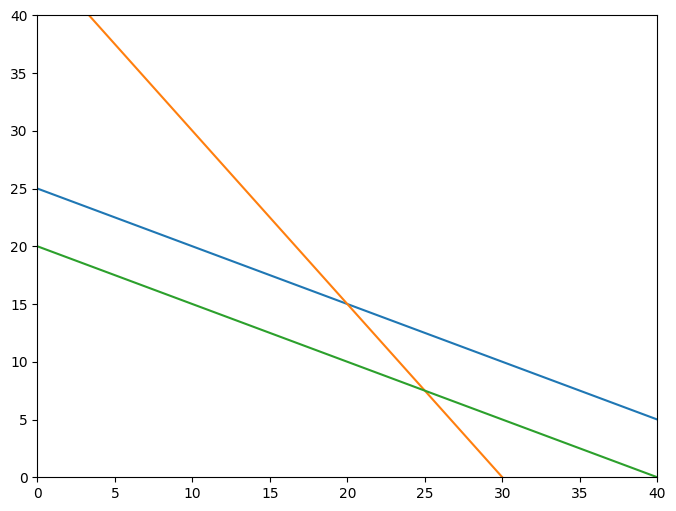

In [15]:
plt.figure(figsize=(8,6))
plt.plot(x_vals, y1, label='Labor Constraint')
plt.plot(x_vals, y2, label='Material Constraint')
plt.plot(x_vals, y3, label='Machine Constraint')
plt.xlim(0, 40)
plt.ylim(0, 40)


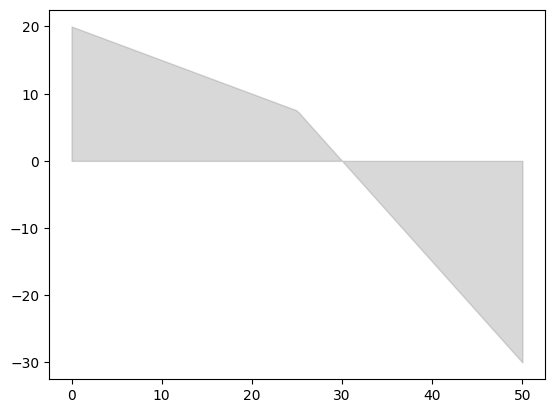

In [16]:
# Feasible region shading
plt.fill_between(x_vals, np.minimum(np.minimum(y1, y2), y3), color='gray', alpha=0.3)

Insights:

Optimal production plan:  25 units of Product A, 7.5 units of Product B.

Total Profit: ₹725.

All resource constraints were active at the optimal point.

The company can increase profit only by relaxing one or more constraints (like labor or materials).